# <b><u><i>Import Required Libraries</b></u></i>

##  Import  Libraries

### This cell imports all essential Python libraries used in:
<ul>
<li> Data handling (`pandas`)</li>
 <li>Data visualization (`matplotlib`, `seaborn`)</li>
 <li> Machine learning and evaluation (`scikit-learn`)</li>
  <li>Saving/loading models (`pickle`)</li>
  <li>Timestamping with `datetime`</li>
<ul>

In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVR, SVC
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score
)
from datetime import datetime
import pickle

%matplotlib inline


# <b><i><u>Load Dataset</u></i></b>

###  Load the Dataset

<p>This cell loads the Kaggle "StudentsPerformance.csv" dataset which contains students' exam scores and demographic data.<p>


In [ ]:
# Load the dataset
df = pd.read_csv("StudentsPerformance.csv")
"""
Step: Load CSV File

Overview:
    Loads the dataset from the CSV file "StudentsPerformance.csv" into a 
    pandas DataFrame for further analysis.
    dataframe ko save kerta hai as self.df
Function:
    pd.read_csv()

Parameters:
    "StudentsPerformance.csv" : str
        Path to the CSV file containing the dataset.

Description:
    Uses pandas to read the CSV file and assigns the resulting DataFrame 
    to the variable `df`, enabling exploration and processing.
"""
df.head()
"""
Step: View Top Rows of Data

Overview:
    Displays the first 5 rows of the dataset.

Function:
    df.head()

Parameters:
    n : int, optional (default=5)
        Number of top rows to return.

Description:
    Provides a quick preview of the data, including column headers and sample
    values. Useful for verifying the structure of the loaded DataFrame.
"""



'\nStep: View Top Rows of Data\n\nOverview:\n    Displays the first 5 rows of the dataset.\n\nFunction:\n    df.head()\n\nParameters:\n    n : int, optional (default=5)\n        Number of top rows to return.\n\nDescription:\n    Provides a quick preview of the data, including column headers and sample\n    values. Useful for verifying the structure of the loaded DataFrame.\n'

# <b><i><u>DataAnalyzer Class</u></i></b>

### Define <b>DataAnalyzer</b> Class

<p>A helper class to explore the dataset — view rows, types, check nulls, stats, shape, etc.</p>


In [4]:

class DataAnalyzer:
    """
    Class Name: DataAnalyzer

    Overview:
        A class to load, explore, and analyze a dataset (CSV) using pandas.

    Parameters:
        file_path : str
            The path to the CSV file to be loaded.
    """

    def __init__(self, file_path):
        """
        Function: __init__

        Overview:
            Initializes the class with the file path.

        Parameters:
            file_path : str
                Path to the CSV file.

        Description:
            Stores the file path and prepares the object for data loading.
        """
        self.file_path = file_path

    def data_load(self):
        """
        Function: data_load

        Overview:
            Loads the CSV file into a pandas DataFrame.

        Parameters:
            data : required

        Description:
            Uses pandas.read_csv() to load the dataset and assigns it to self.df.
        """
        self.df = pd.read_csv(self.file_path)
        return self.df

    def head(self, n=5):
        """
        Function: head

        Overview:
            Returns the first n rows of the dataset.

        Parameters:
            n : int, optional (default=5)

        Description:
            Useful for previewing the top of the DataFrame.
        """
        return self.df.head(n)

    def sample(self, n=5):
        """
        Function: sample

        Overview:
            Returns a random sample of n rows from a copy of the dataset.

        Parameters:
            n : int, optional (default=5)

        Description:
            Helps inspect random entries without modifying the original DataFrame.
        """
        return self.df.copy().sample(n)

    def tail(self, n=5):
        """
        Function: tail

        Overview:
            Returns the last n rows of the dataset.

        Parameters:
            n : int, optional (default=5)

        Description:
            Useful for viewing the bottom part of the dataset.
        """
        return self.df.tail(n)

    def datatypes(self):
        """
        Function: datatypes

        Overview:
            Displays the data types of all columns.

        Parameters:
            data : required

        Description:
            Returns a Series showing the type of each column in the dataset.
        """
        return self.df.dtypes

    def describe(self):
        """
        Function: describe

        Overview:
            Provides descriptive statistics of numerical columns.

        Parameters:
            data : required

        Description:
            Includes count, mean, std, min, 25%, 50%, 75%, max for each numeric column.
        """
        return self.df.describe()

    def check_nulls(self):
        """
        Function: check_nulls

        Overview:
            Checks for null values in each column.

        Parameters:
            data : required

        Description:
            Returns a Series with the count of NaNs in each column.
        """
        return self.df.isnull().sum()

    def column_names(self):
        """
        Function: column_names

        Overview:
            Lists all column names in the dataset.

        Parameters:
            data : required

        Description:
            Returns a list of column headers from the DataFrame.
        """
        return self.df.columns.tolist()

    def shape(self):
        """
        Function: shape

        Overview:
            Returns the shape (rows, columns) of the dataset.

        Parameters:
            data : required

        Description:
            Returns a tuple representing the dataset’s dimensions.
        """
        return self.df.shape

    def info(self):
        """
        Function: info

        Overview:
            Prints information about the DataFrame.

        Parameters:
            data : required

        Description:
            Includes index range, column types, nulls, and memory usage.
        """
        return self.df.info()

    def size(self):
        """
        Function: size

        Overview:
            Returns the total number of elements (cells) in the DataFrame.

        Parameters:
            data : required

        Description:
            Equal to rows × columns.
        """
        return self.df.size

    def correlation_matrix(self, numeric_only=True):
        """
        Function: correlation_matrix

        Overview:
            Calculates the correlation between numeric columns.

        Parameters:
            numeric_only : bool, optional (default=True)

        Description:
            Helps in identifying relationships between variables.
        """
        return self.df.corr(numeric_only=numeric_only)

    def duplicated(self):
        """
        Function: duplicated

        Overview:
            Counts the number of duplicated rows.

        Parameters:
            data : required

        Description:
            Returns how many rows are exact duplicates.
        """
        return self.df.duplicated().sum()


# <b><u><i>GraphPlotter Class</b></u></i>

### Define GraphPlotter Class

<p>A plotting class to create common visualizations: histogram, count plot, scatter plot, and heatmap.</p>

### Visualize Basic Plots

<p>These plots help understand the distribution and relationships of key variables.</p>




In [5]:

class GraphPlotter:
    """
    Class Name: GraphPlotter

    Overview:
        A class to visualize data from a pandas DataFrame using matplotlib and seaborn.

    Parameters:
        data : pandas.DataFrame
            The DataFrame containing the data to plot.
    """

    def __init__(self, data):
        """
        Function: __init__

        Overview:
            Initializes the class with the dataset.

        Parameters:
            data : pandas.DataFrame
                The dataset to be used for plotting.

        Description:
            Stores the DataFrame as an instance variable for later visualization.
        """
        self.data = data

    def histogram(self, column, bins=10, title=None):
        """
        Function: histogram

        Overview:
            Plots a histogram with a KDE for the specified column.

        Parameters:
            column : str
                The column name in the DataFrame to plot.
            bins : int, optional (default=10)
                Number of bins in the histogram.
            title : str, optional
                Custom title for the plot.

        Description:
            Visualizes the distribution of numerical data in the selected column
            using a histogram overlaid with a Kernel Density Estimate (KDE).
        """
        plt.figure(figsize=(8, 5))
        sns.histplot(self.data[column], bins=bins, kde=True)
        plt.title(title or f"Histogram of {column}")
        plt.show()

    def countplot(self, column, title=None):
        """
        Function: countplot

        Overview:
            Plots a count plot for the specified categorical column.

        Parameters:
            column : str
                The column name in the DataFrame to plot.
            title : str, optional
                Custom title for the plot.

        Description:
            Displays the frequency of each category in the specified column as a bar plot,
            with x-axis labels rotated for readability.
        """
        plt.figure(figsize=(8, 5))
        sns.countplot(x=self.data[column])
        plt.title(title or f"Count Plot of {column}")
        plt.xticks(rotation=45)
        plt.show()

    def scatter_plot(self, x_col, y_col, title=None):
        """
        Function: scatter_plot

        Overview:
            Creates a scatter plot to visualize the relationship between two numeric columns.

        Parameters:
            x_col : str
                The column name for the x-axis.
            y_col : str
                The column name for the y-axis.
            title : str, optional
                Custom title for the plot.

        Description:
            Helps identify correlations or patterns between two variables by plotting
            individual data points.
        """
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=self.data[x_col], y=self.data[y_col])
        plt.title(title or f"Scatter Plot: {x_col} vs {y_col}")
        plt.show()

    def heatmap(self, title="Correlation Heatmap"):
        """
        Function: heatmap

        Overview:
            Plots a heatmap showing correlations between numeric columns.

        Parameters:
            title : str, optional (default="Correlation Heatmap")
                Title for the heatmap.

        Description:
            Calculates the correlation matrix and visualizes it with colors and annotations,
            aiding in understanding relationships between variables.
        """
        plt.figure(figsize=(10, 6))
        corr = self.data.corr(numeric_only=True)
        sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title(title)
        plt.show()


# <b><u><i>UnivariatePlots Class</b></i></u>

### Define UnivariatePlots Class

<p>Used to explore one column (univariate data) with various plots like histogram, boxplot, pie chart, etc.</p>

### Run Univariate Visualizations

<p>Analyzing each variable separately helps spot outliers and understand variable types and distributions.</p>



In [6]:

class UnivariatePlots:
    """
    Class Name: UnivariatePlots

    Overview:
        A class for performing univariate visual analysis on a dataset.

    Parameters:
        data : pandas.DataFrame
            The DataFrame containing the data to plot.
    """

    def __init__(self, data):
        """
        Function: __init__

        Overview:
            Initializes the class with the dataset.

        Parameters:
            data : pandas.DataFrame
                Dataset to be used for plotting.

        Description:
            Stores the DataFrame as an instance variable for univariate plotting.
        """
        self.data = data

    def histogram(self, column, bins=10, title=None):
        """
        Function: histogram

        Overview:
            Plots a histogram with KDE for a single numeric variable.

        Parameters:
            column : str
                The column name to plot.
            bins : int, optional (default=10)
                Number of bins for the histogram.
            title : str, optional
                Custom plot title.

        Description:
            Visualizes the distribution and density estimate of the variable.
        """
        plt.figure(figsize=(8, 5))
        sns.histplot(self.data[column], bins=bins, kde=True)
        plt.title(title or f"Histogram of {column}")
        plt.show()

    def boxplot(self, column, title=None):
        """
        Function: boxplot

        Overview:
            Displays a boxplot for the specified variable.

        Parameters:
            column : str
                The column name to plot.
            title : str, optional
                Custom plot title.

        Description:
            Summarizes the distribution, median, quartiles, and potential outliers.
        """
        plt.figure(figsize=(7, 3))
        sns.boxplot(x=self.data[column])
        plt.title(title or f"Boxplot of {column}")
        plt.show()

    def violinplot(self, column, title=None):
        """
        Function: violinplot

        Overview:
            Shows a violin plot for the specified variable.

        Parameters:
            column : str
                The column name to plot.
            title : str, optional
                Custom plot title.

        Description:
            Combines a boxplot and KDE to show distribution shape and spread.
        """
        plt.figure(figsize=(7, 4))
        sns.violinplot(x=self.data[column])
        plt.title(title or f"Violin Plot of {column}")
        plt.show()

    def kde_plot(self, column, title=None):
        """
        Function: kde_plot

        Overview:
            Plots the kernel density estimate for the variable.

        Parameters:
            column : str
                The column name to plot.
            title : str, optional
                Custom plot title.

        Description:
            Shows a smoothed probability density curve for the variable’s distribution.
        """
        plt.figure(figsize=(8, 4))
        sns.kdeplot(self.data[column], fill=True)
        plt.title(title or f"KDE Plot of {column}")
        plt.show()

    def countplot(self, column, title=None):
        """
        Function: countplot

        Overview:
            Displays a count plot for categorical variables.

        Parameters:
            column : str
                The column name to plot.
            title : str, optional
                Custom plot title.

        Description:
            Shows the frequency of each category in the specified column.
        """
        plt.figure(figsize=(8, 5))
        sns.countplot(x=self.data[column])
        plt.title(title or f"Count Plot of {column}")
        plt.show()

    def pie_chart(self, column, title=None):
        """
        Function: pie_chart

        Overview:
            Plots a pie chart for the distribution of categories in a column.

        Parameters:
            column : str
                The column name to plot.
            title : str, optional
                Custom plot title.

        Description:
            Visualizes proportions of categorical data as slices of a pie.
        """
        data = self.data[column].value_counts()
        plt.figure(figsize=(6, 6))
        plt.pie(data, labels=data.index, autopct="%1.1f%%", startangle=140)
        plt.title(title or f"Pie Chart of {column}")
        plt.axis("equal")
        plt.show()


# <b><u><i>BivariatePlots Class</b></u></i>

### Define BivariatePlots Class

<p>Used for exploring relationships between **two** variables bivariate analysis.</p>

### Run Bivariate Visualizations

<p>These plots compare two variables to detect relationships and category-based distributions.</p>


In [7]:

class BivariatePlots:
    """
    Class Name: BivariatePlots

    Overview:
        A class for performing bivariate visual analysis on a dataset.

    Parameters:
        data : pandas.DataFrame
            The DataFrame containing the data to plot.
    """

    def __init__(self, data):
        """
        Function: __init__

        Overview:
            Initializes the class with the dataset.

        Parameters:
            data : pandas.DataFrame
                Dataset to be used for plotting.

        Description:
            Stores the DataFrame as an instance variable for bivariate plotting.
        """
        self.data = data

    def scatter_plot(self, x_col, y_col, title=None):
        """
        Function: scatter_plot

        Overview:
            Creates a scatter plot to visualize the relationship between two numeric variables.

        Parameters:
            x_col : str
                Name of the column for the x-axis.
            y_col : str
                Name of the column for the y-axis.
            title : str, optional
                Custom plot title.

        Description:
            Displays individual data points to explore correlation or patterns.
        """
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=self.data[x_col], y=self.data[y_col])
        plt.title(title or f"Scatter Plot: {x_col} vs {y_col}")
        plt.show()

    def line_plot(self, x_col, y_col, title=None):
        """
        Function: line_plot

        Overview:
            Creates a line plot to visualize trends between two numeric variables.

        Parameters:
            x_col : str
                Name of the column for the x-axis.
            y_col : str
                Name of the column for the y-axis.
            title : str, optional
                Custom plot title.

        Description:
            Useful for time series or ordered data to show changes over x.
        """
        plt.figure(figsize=(8, 5))
        sns.lineplot(x=self.data[x_col], y=self.data[y_col])
        plt.title(title or f"Line Plot: {x_col} vs {y_col}")
        plt.show()

    def bar_plot(self, x_col, y_col, title=None):
        """
        Function: bar_plot

        Overview:
            Creates a bar plot to compare means (or aggregate) of y grouped by x categories.

        Parameters:
            x_col : str
                Categorical variable for x-axis.
            y_col : str
                Numeric variable for y-axis.
            title : str, optional
                Custom plot title.

        Description:
            Summarizes numeric data by categories for visual comparison.
        """
        plt.figure(figsize=(8, 5))
        sns.barplot(x=self.data[x_col], y=self.data[y_col])
        plt.title(title or f"Bar Plot: {x_col} vs {y_col}")
        plt.xticks(rotation=45)
        plt.show()

    def box_plot(self, x_col, y_col, title=None):
        """
        Function: box_plot

        Overview:
            Creates a boxplot of y grouped by categories in x.

        Parameters:
            x_col : str
                Categorical variable for x-axis.
            y_col : str
                Numeric variable for y-axis.
            title : str, optional
                Custom plot title.

        Description:
            Displays distribution and outliers of y per category of x.
        """
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=self.data[x_col], y=self.data[y_col])
        plt.title(title or f"Boxplot: {y_col} by {x_col}")
        plt.xticks(rotation=45)
        plt.show()

    def violin_plot(self, x_col, y_col, title=None):
        """
        Function: violin_plot

        Overview:
            Creates a violin plot of y grouped by categories in x.

        Parameters:
            x_col : str
                Categorical variable for x-axis.
            y_col : str
                Numeric variable for y-axis.
            title : str, optional
                Custom plot title.

        Description:
            Combines boxplot and KDE to show distribution shape per category.
        """
        plt.figure(figsize=(8, 5))
        sns.violinplot(x=self.data[x_col], y=self.data[y_col])
        plt.title(title or f"Violin Plot: {y_col} by {x_col}")
        plt.xticks(rotation=45)
        plt.show()

    def strip_plot(self, x_col, y_col, title=None):
        """
        Function: strip_plot

        Overview:
            Creates a strip plot of y grouped by categories in x with jitter.

        Parameters:
            x_col : str
                Categorical variable for x-axis.
            y_col : str
                Numeric variable for y-axis.
            title : str, optional
                Custom plot title.

        Description:
            Displays all individual observations to visualize data spread and clustering.
        """
        plt.figure(figsize=(8, 5))
        sns.stripplot(x=self.data[x_col], y=self.data[y_col], jitter=True)
        plt.title(title or f"Strip Plot: {y_col} by {x_col}")
        plt.xticks(rotation=45)
        plt.show()

    def swarm_plot(self, x_col, y_col, title=None):
        """
        Function: swarm_plot

        Overview:
            Creates a swarm plot of y grouped by categories in x.

        Parameters:
            x_col : str
                Categorical variable for x-axis.
            y_col : str
                Numeric variable for y-axis.
            title : str, optional
                Custom plot title.

        Description:
            Similar to strip plot but points are adjusted to avoid overlap.
        """
        plt.figure(figsize=(8, 5))
        sns.swarmplot(x=self.data[x_col], y=self.data[y_col])
        plt.title(title or f"Swarm Plot: {y_col} by {x_col}")
        plt.xticks(rotation=45)
        plt.show()


# <b><u><i>SVMTrainer Class</b></u></i>

### Define SVMTrainer Class

Handles all machine learning steps — preprocessing, training, predicting, and evaluating an SVM model.

### Train & Evaluate the Model

Now we train an SVR (Support Vector Regression) model to predict students' math scores.



In [8]:

class SVMTrainer:
    """
    Class Name: SVMTrainer

    Overview:
        Facilitates training, prediction, and evaluation of Support Vector Machine (SVM) models
        for regression or classification tasks on a given dataset.

    Parameters:
        data : pandas.DataFrame
            The dataset containing features and the target column.
        target_column : str
            The name of the column representing the target variable.
        task : str, default='regression'
            The type of machine learning task, either 'regression' or 'classification'.
    """

    def __init__(self, data, target_column, task='regression'):
        """
        Function: __init__

        Overview:
            Initializes the trainer with the dataset, target column, and task type.

        Parameters:
            data : pandas.DataFrame
                Dataset to use.
            target_column : str
                Target variable column name.
            task : str, optional (default='regression')
                Type of problem: 'regression' or 'classification'.

        Raises:
            ValueError: If task is not 'classification' or 'regression'.
        """
        self.data = data
        self.target_column = target_column
        self.task = task.lower()
        if self.task not in ['classification', 'regression']:
            raise ValueError("Task must be either 'classification' or 'regression'")

    def preprocess(self, drop_columns=None, fillna_value=None):
        """
        Function: preprocess

        Overview:
            Prepares the data for modeling by handling missing values, encoding categorical variables,
            and separating features and target.

        Parameters:
            drop_columns : list of str, optional
                Columns to drop before modeling.
            fillna_value : scalar, optional
                Value to fill missing data; if None, drops missing data rows.

        Returns:
            X : pandas.DataFrame
                Feature variables after preprocessing.
            y : pandas.Series
                Target variable.

        Description:
            Encodes categorical variables using one-hot encoding and prepares clean datasets for training.
        """
        df = self.data.copy()
        if drop_columns:
            df = df.drop(columns=drop_columns)
        if fillna_value is not None:
            df = df.fillna(fillna_value)
        else:
            df = df.dropna()

        df = pd.get_dummies(df, drop_first=True)

        self.X = df.drop(self.target_column, axis=1)
        self.y = df[self.target_column]
        return self.X, self.y

    def split_data(self, test_size=0.2):
        """
        Function: split_data

        Overview:
            Splits the data into training and testing sets.

        Parameters:
            test_size : float, optional (default=0.2)
                Proportion of dataset to use as test data.

        Returns:
            X_train, X_test, y_train, y_test : arrays
                Training and testing feature and target sets.
        """
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=42)
        return self.X_train, self.X_test, self.y_train, self.y_test

    def scale_data(self):
        """
        Function: scale_data

        Overview:
            Scales features using StandardScaler to have zero mean and unit variance.

        Returns:
            X_train_scaled, X_test_scaled : arrays
                Scaled training and testing feature sets.
        """
        self.scaler = StandardScaler()
        self.X_train = self.scaler.fit_transform(self.X_train)
        self.X_test = self.scaler.transform(self.X_test)
        return self.X_train, self.X_test

    def train_model(self, kernel='rbf', C=1.0, gamma='scale'):
        """
        Function: train_model

        Overview:
            Trains an SVM model (SVR for regression) using specified hyperparameters.

        Parameters:
            kernel : str, optional (default='rbf')
                Kernel type to be used in the algorithm.
            C : float, optional (default=1.0)
                Regularization parameter.
            gamma : str or float, optional (default='scale')
                Kernel coefficient.

        Returns:
            model : sklearn.svm.SVR
                The trained SVM model.
        """
        self.model = SVR(kernel=kernel, C=C, gamma=gamma)
        self.model.fit(self.X_train, self.y_train)
        return self.model

    def predict(self):
        """
        Function: predict

        Overview:
            Generates predictions using the trained SVM model on the test data.

        Returns:
            y_pred : array
                Predicted values for the test set.
        """
        self.y_pred = self.model.predict(self.X_test)
        return self.y_pred

    def evaluate(self):
        """
        Function: evaluate

        Overview:
            Evaluates the performance of the model using common regression metrics.

        Returns:
            metrics : dict
                Dictionary containing Mean Squared Error (MSE), Mean Absolute Error (MAE),
                and R2 Score.
        """
        return {
            "MSE": mean_squared_error(self.y_test, self.y_pred),
            "MAE": mean_absolute_error(self.y_test, self.y_pred),
            "R2 Score": r2_score(self.y_test, self.y_pred)
        }


# <b><u><i>ModelPersistence Class</b></u></i>

### Define ModelPersistence Class

This class handles saving and loading of:
<ul>
<li> The trained model (`.pkl`)</li>
 <li>The scaler used in preprocessing</li>
 <li>Metadata such as evaluation results and timestamp</li>
</ul>

###  Save Trained Model and Metadata

We now save:
<ul>
  <li>The trained (.'SVR') model</li>
  <li>The StandardScaler used</li>
  <li>Model metadata (evaluation, model type, timestamp)</li>
</ul>


In [ ]:

class ModelPersistence:
    """
    Class Name: ModelPersistence

    Overview:
        Provides functionality to save and load machine learning models, scalers,
        and metadata using pickle serialization for easy storage and retrieval.
    """

    def save_model(self, model, filename="svm_model.pkl"):
        """
        Function: save_model

        Overview:
            Serializes and saves the trained model to a file.
            Model ko file main likhta hai 
        Parameters:
            model : object
                The trained machine learning model to save.
            filename : str, optional (default="svm_model.pkl")
                The file path to save the model.
        """
        with open(filename, 'wb') as f:
            pickle.dump(model, f)

    def save_scaler(self, scaler, filename="scaler.pkl"):
        """
        Function: save_scaler

        Overview:
            Serializes and saves the scaler object used for data preprocessing.

        Parameters:
            scaler : object
                The scaler instance (e.g., StandardScaler) to save.
            filename : str, optional (default="scaler.pkl")
                The file path to save the scaler.
        """
        with open(filename, 'wb') as f:
            pickle.dump(scaler, f)

    def save_metadata(self, metadata_dict, filename="metadata.pkl"):
        """
        Function: save_metadata

        Overview:
            Serializes and saves metadata information such as model parameters, 
            training configurations, or dataset details.

        Parameters:
            metadata_dict : dict
                Dictionary containing metadata to save.
            filename : str, optional (default="metadata.pkl")
                The file path to save the metadata.
        """
        with open(filename, 'wb') as f:
            pickle.dump(metadata_dict, f)

    def load_model(self, filename="svm_model.pkl"):
        """
        Function: load_model

        Overview:
            Loads and deserializes a saved machine learning model from file.
            model ko file se wapis uthata hai 
        Parameters:
            filename : str, optional (default="svm_model.pkl")
                The file path from which to load the model.

        Returns:
            model : object
                The loaded machine learning model.
        """
        with open(filename, 'rb') as f:
            return pickle.load(f)

    def load_scaler(self, filename="scaler.pkl"):
        """
        Function: load_scaler

        Overview:
            Loads and deserializes a saved scaler object from file.

        Parameters:
            filename : str, optional (default="scaler.pkl")
                The file path from which to load the scaler.

        Returns:
            scaler : object
                The loaded scaler instance.
        """
        with open(filename, 'rb') as f:
            return pickle.load(f)

    def load_metadata(self, filename="metadata.pkl"):
        """
        Function: load_metadata

        Overview:
            Loads and deserializes saved metadata from file. 
         deserializes: Converts data from a saved format (like JSON, binary, or file) back into a usable object in memory.
        Parameters:
            filename : str, optional (default="metadata.pkl")
                The file path from which to load the metadata.

        Returns:
            metadata_dict : dict
                The loaded metadata dictionary.
        """
        with open(filename, 'rb') as f:
            return pickle.load(f)


# <b><u><i>Output</b></u></i>

# 📄 Load Dataset

In [10]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 📊 Basic Data Exploration

In [11]:
analyzer = DataAnalyzer("StudentsPerformance.csv")
df = analyzer.data_load()

In [13]:
analyzer.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
analyzer.sample()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
692,female,group C,bachelor's degree,free/reduced,completed,66,74,81
588,female,group C,some college,standard,none,54,64,65
107,male,group E,associate's degree,standard,completed,66,63,64
603,male,group D,high school,free/reduced,none,60,57,51
153,male,group D,bachelor's degree,standard,none,54,49,47


In [15]:
analyzer.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [16]:
analyzer.datatypes()

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [17]:
analyzer.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
analyzer.check_nulls()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [19]:
analyzer.column_names()

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [20]:
analyzer.shape()

(1000, 8)

In [21]:
analyzer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [22]:
print(analyzer.size())

8000


In [23]:
print(analyzer.correlation_matrix())

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


In [24]:
print(analyzer.duplicated())

0


# 📊 Plot Some Visualizations

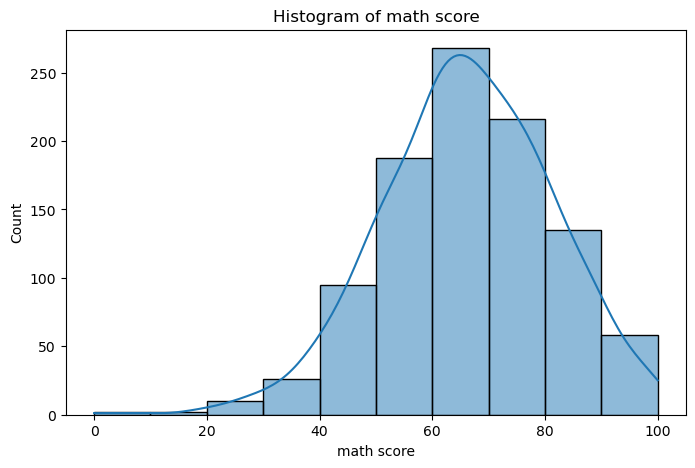

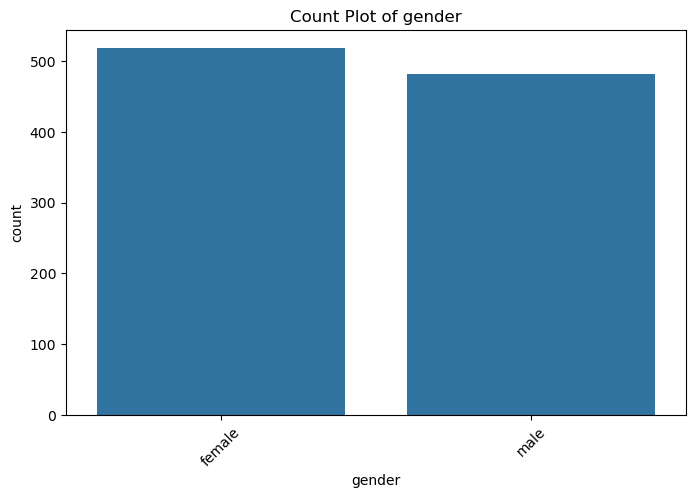

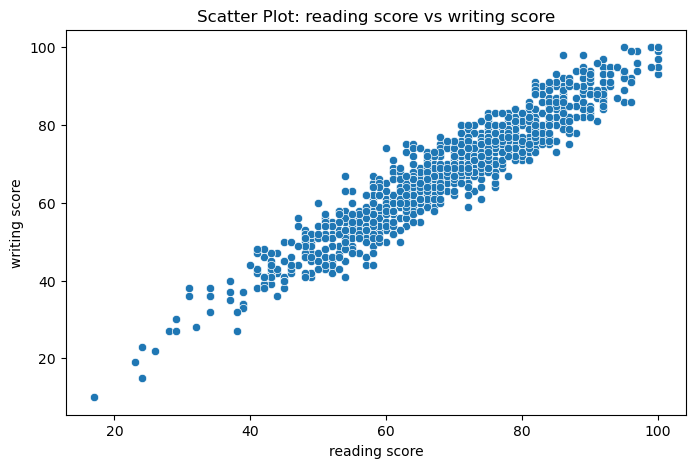

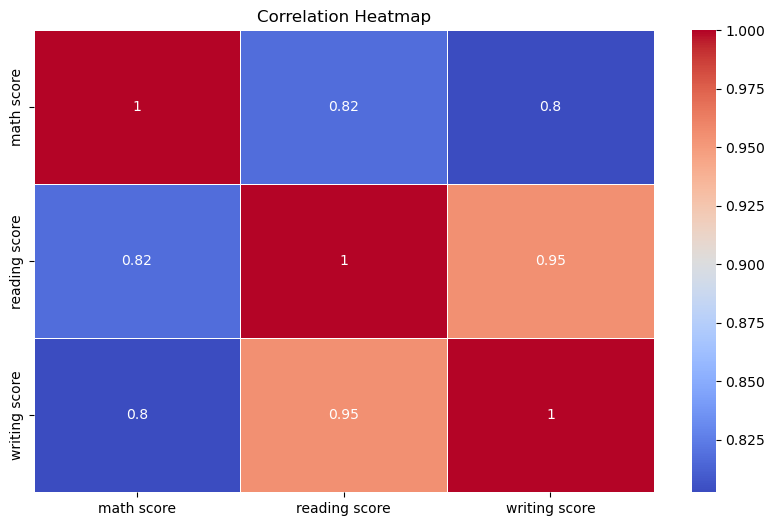

In [ ]:
plotter = GraphPlotter(df)
plotter.histogram("math score")
'''X-axis → "math score"
Represents students' math exam scores (ranging from 0 to 100).
Y-axis → "Count"
Shows how many students scored in a certain range (frequency count).

the tallest bar (around score 60–70) shows that most students scored in this range — over 250 students.

'''
plotter.countplot("gender")

'''
X-axis → gender

Categories: female and male

Y-axis → count

Number of students in each gender group.

Female count ≈ 520+

Male count ≈ 480
 
Females are more then Males 

'''
plotter.scatter_plot("reading score", "writing score")

''''
The data follows a nearly straight-line trend.

This indicates a very strong linear correlation between reading and writing.

Most students scored between 50 and 90 in both subjects.

'''

plotter.heatmap()
'''
Strongest correlation is between reading and writing scores (0.95) — students who do well in reading tend to do very well in writing.

Math is also positively correlated with both reading (0.82) and writing (0.80), but not as strongly as reading and writing are with each other.

A correlation coefficient ranges from -1 to 1:

+1: Perfect positive correlation

0: No correlation

-1: Perfect negative correlation

'''

# Univariate Plots

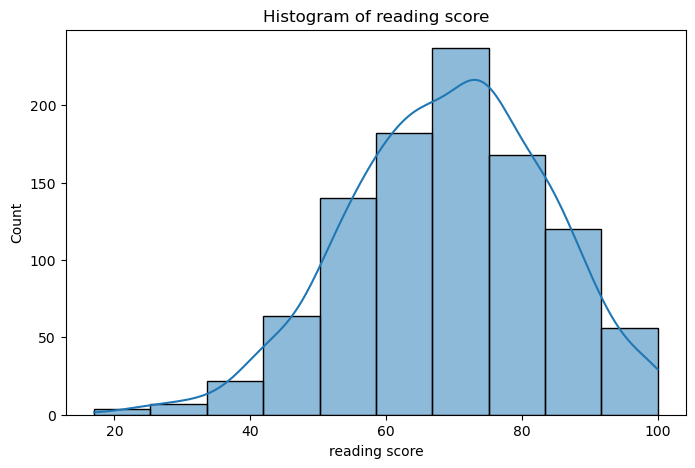

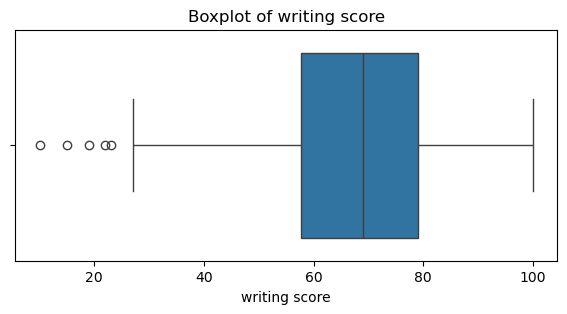

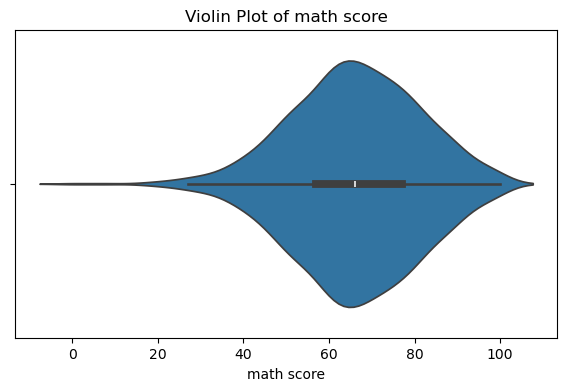

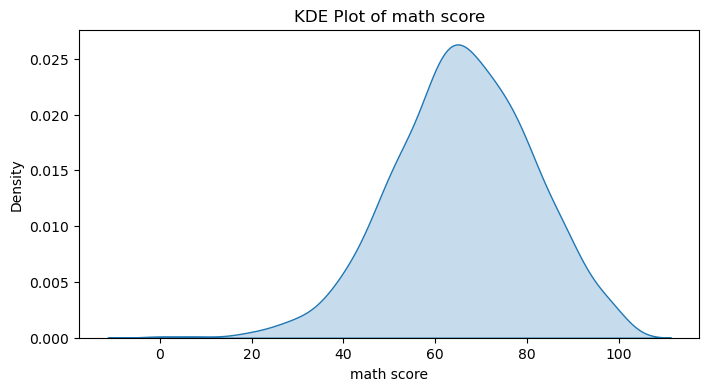

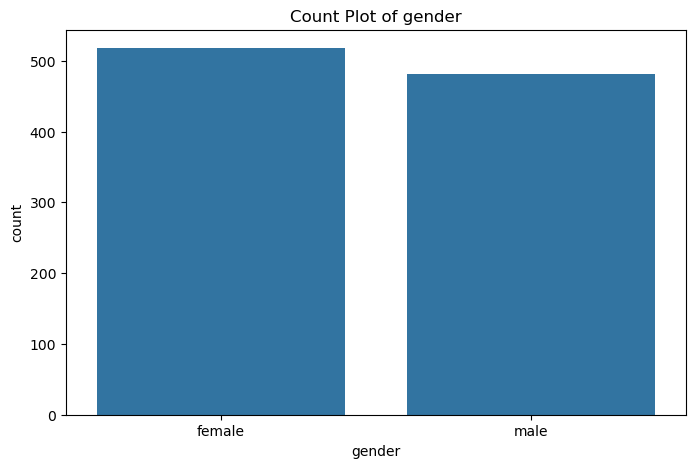

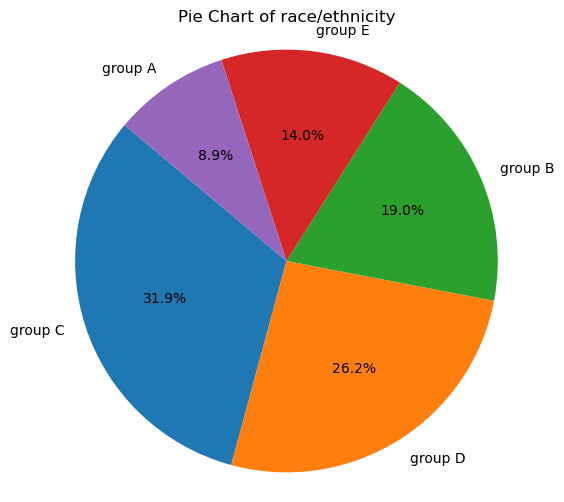

In [ ]:
uni = UnivariatePlots(df)
uni.histogram("reading score")
uni.boxplot("writing score")

'''
From the chart, it's around 70–75, so most students scored around that.

'''
uni.violinplot("math score")
'''
Most students scored between 50 and 90 in math.

There are more students with scores around 60 to 80 (see the wider area there).

Fewer students scored really low (below 30) or very high (above 90), because the ends are thinner.

'''

uni.kde_plot("math score")
uni.countplot("gender")
uni.pie_chart("race/ethnicity")

'''
it shows the percentage whole it occupies
'''

# Bivariate Plots

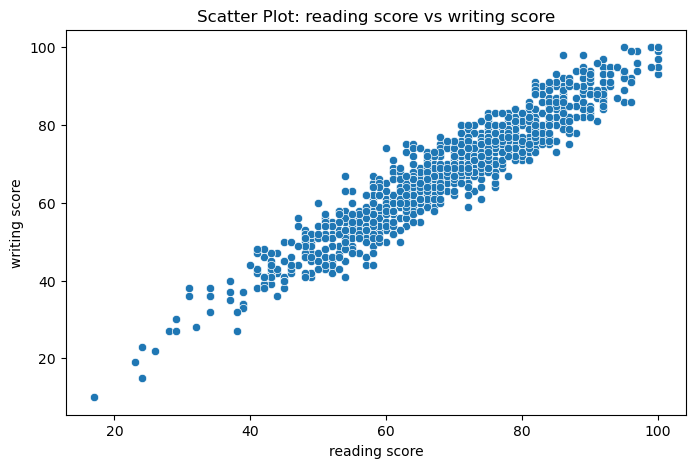

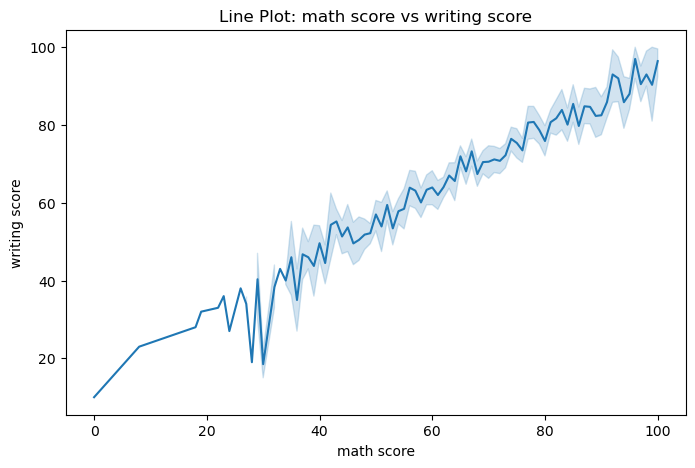

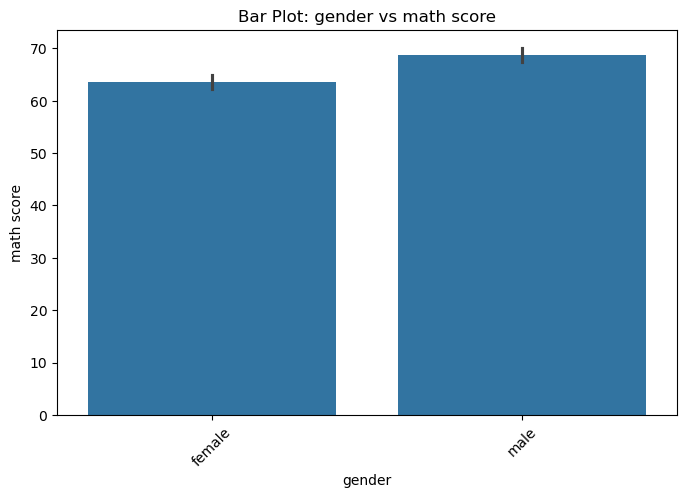

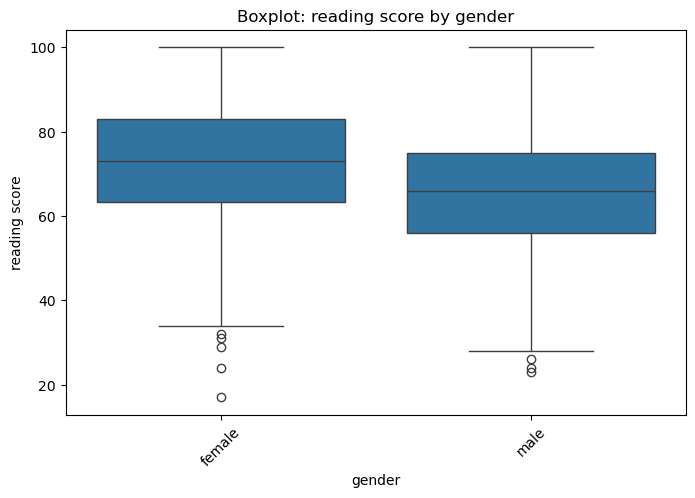

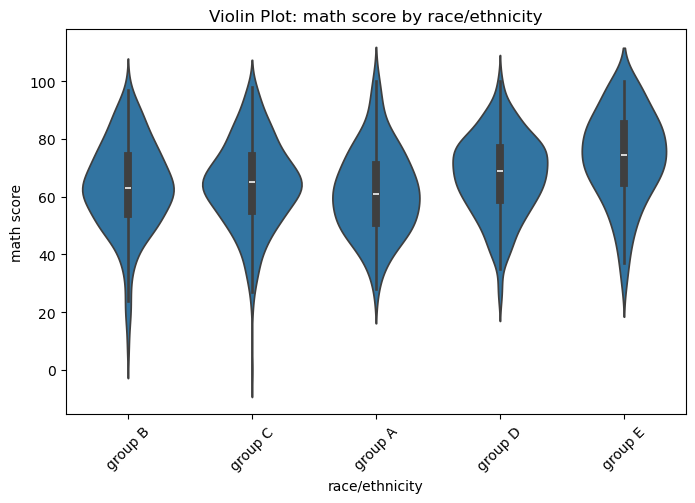

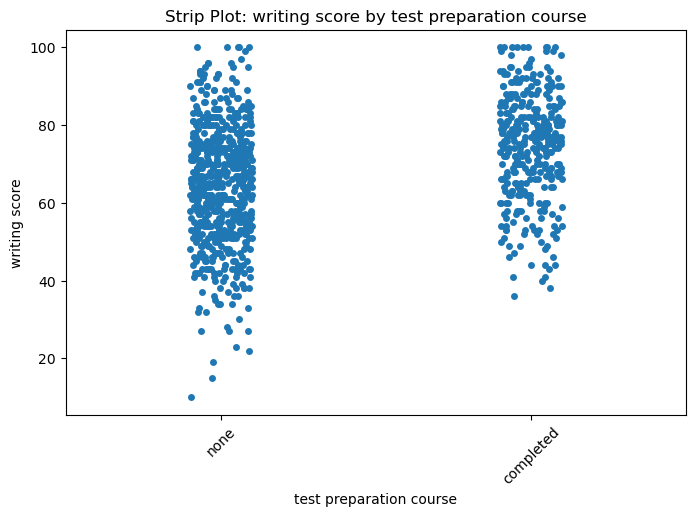

c:\Users\Sadeen Batool\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Sadeen Batool\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


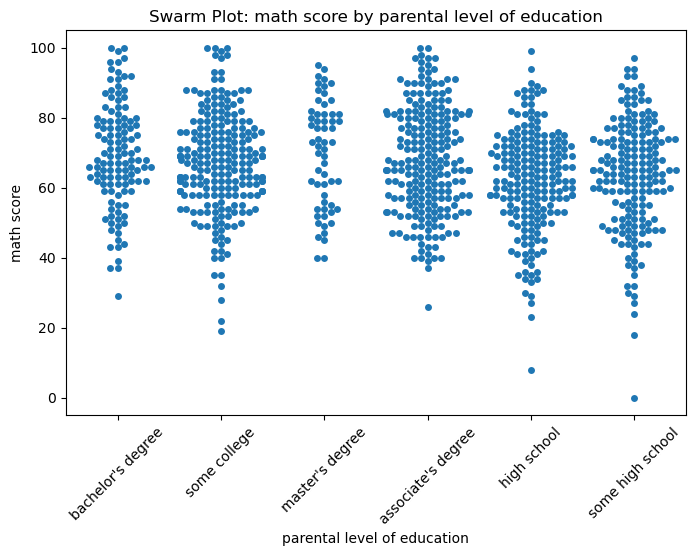

In [ ]:
bi = BivariatePlots(df)
bi.scatter_plot("reading score", "writing score")
bi.line_plot("math score", "writing score")
'''
this show the good correlation between the math and writting score

'''

bi.bar_plot("gender", "math score")
bi.box_plot("gender", "reading score")
bi.violin_plot("race/ethnicity", "math score")
'''
Grp B shows the higher median score while the other grps contain the same median score

'''
bi.strip_plot("test preparation course", "writing score")

'''
the students that complete the test prepration course scored higher then those who didnt complete

'''
bi.swarm_plot("parental level of education", "math score")

''''
the students parents who hold the bachelor degree have higher math score on average 

'''

# SVM Trainer Model

In [28]:
trainer = SVMTrainer(data=df, target_column="math score", task="regression")
trainer.preprocess()
trainer.split_data()
trainer.scale_data()
trainer.train_model()
trainer.predict()
print(trainer.evaluate())


{'MSE': 80.3929805654161, 'MAE': 6.379621025123688, 'R2 Score': 0.6696247671332758}


# Save model, scaler, and metadata

In [29]:
persistence = ModelPersistence()

persistence.save_model(trainer.model)
persistence.save_scaler(trainer.scaler)
persistence.save_metadata({
    "task": trainer.task,
    "model_type": type(trainer.model).__name__,
    "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    "evaluation": trainer.evaluate()
})
print(" Model, scaler, and metadata saved successfully!")

 Model, scaler, and metadata saved successfully!
